In [184]:
import numpy as np
import pandas as pd
import nltk 
import matplotlib.pyplot as plt
import re

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#import wordcloud

In [185]:
df = pd.read_csv('product_review/1429_1.csv',encoding = "ISO-8859-1")

C:\Users\Pawan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [186]:
df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id                      34660 non-null object
name                    27900 non-null object
asins                   34658 non-null object
brand                   34660 non-null object
categories              34660 non-null object
keys                    34660 non-null object
manufacturer            34660 non-null object
reviews.date            34621 non-null object
reviews.dateAdded       24039 non-null object
reviews.dateSeen        34660 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     34066 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      34131 non-null float64
reviews.rating          34627 non-null float64
reviews.sourceURLs      34660 non-null object
reviews.text            34659 non-null object
reviews.title           34655 non-null object
reviews.userCity        0 non-null float64
reviews.userProvince    0

In [188]:
#find the null in the columns of data frame 
df.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

In [189]:
'''
This function auto handle the null vaules it drops the columns which has null value percantage greater than 50%
argument is the dataframe, it return the cleaned 
'''

def feature_select(dataframe):
	dict = {}
	all_features = dataframe.columns.tolist()
	for feature in all_features:
		per = (dataframe[feature].isnull().sum()/dataframe.shape[0])*100
		per = per.round(3)
		#print('Null values % in  ',feature, ' is ',per)
		dict[feature] = per
	missing_value_matrix = pd.DataFrame(list(dict.items()),columns = ['featue_name','miss_val_per'])
	print('*****missing value in percentage******************')
	print(missing_value_matrix.sort_values('miss_val_per',ascending=False))
	imp_feature = missing_value_matrix[missing_value_matrix['miss_val_per']<50].featue_name.tolist()
	print('\nselected features are --> ',str(imp_feature)) 
	dataframe = dataframe[imp_feature]
	return  dataframe

In [190]:
df = feature_select(df)

*****missing value in percentage******************
             featue_name  miss_val_per
19  reviews.userProvince       100.000
18      reviews.userCity       100.000
10   reviews.didPurchase        99.997
12            reviews.id        99.997
8      reviews.dateAdded        30.643
1                   name        19.504
11   reviews.doRecommend         1.714
13    reviews.numHelpful         1.526
7           reviews.date         0.113
14        reviews.rating         0.095
17         reviews.title         0.014
20      reviews.username         0.006
2                  asins         0.006
16          reviews.text         0.003
9       reviews.dateSeen         0.000
6           manufacturer         0.000
5                   keys         0.000
15    reviews.sourceURLs         0.000
4             categories         0.000
3                  brand         0.000
0                     id         0.000

selected features are -->  ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufac

In [191]:
df.columns 

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username'],
      dtype='object')

In [192]:
df.shape

(34660, 17)

In [197]:
df = df.dropna(subset = ['reviews.text'])

In [198]:
df.shape

(34659, 17)

# Using word cloud to visualise text data

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [199]:
#clean text method 

def clean_text(text):
    regex = re.compile('(<!--(.|\\n)*-->)')
    text = regex.sub('',str(text))
    regex = re.compile('\n')
    clean_text = regex.sub(' ',text)
    clean_text = ''.join(x for x in clean_text if( x.isalpha() or (x ==' ')))
    return clean_text

In [200]:
# function to generate wordcloud

def word_cloud(data,color='black'):
    wordcloud = WordCloud(background_color=color, stopwords=STOPWORDS, max_words=200, max_font_size=40,  random_state=23)
    wordcloud = wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(20, 20))
    plt.imshow(wordcloud)

In [201]:
df['reviews.text'] = df['reviews.text'].apply(clean_text)

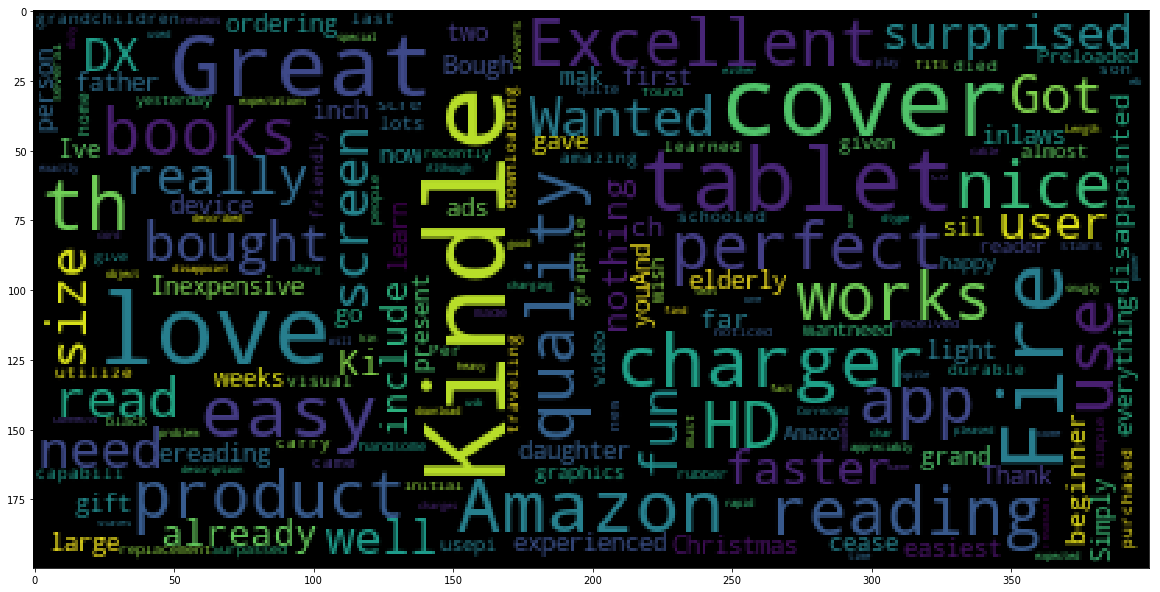

In [202]:
word_cloud(df['reviews.text'])

# word colud of all the positive reveiw 

In [203]:
recom_ture = df[df['reviews.doRecommend']==True]

In [204]:
recom_ture.shape

(32682, 17)

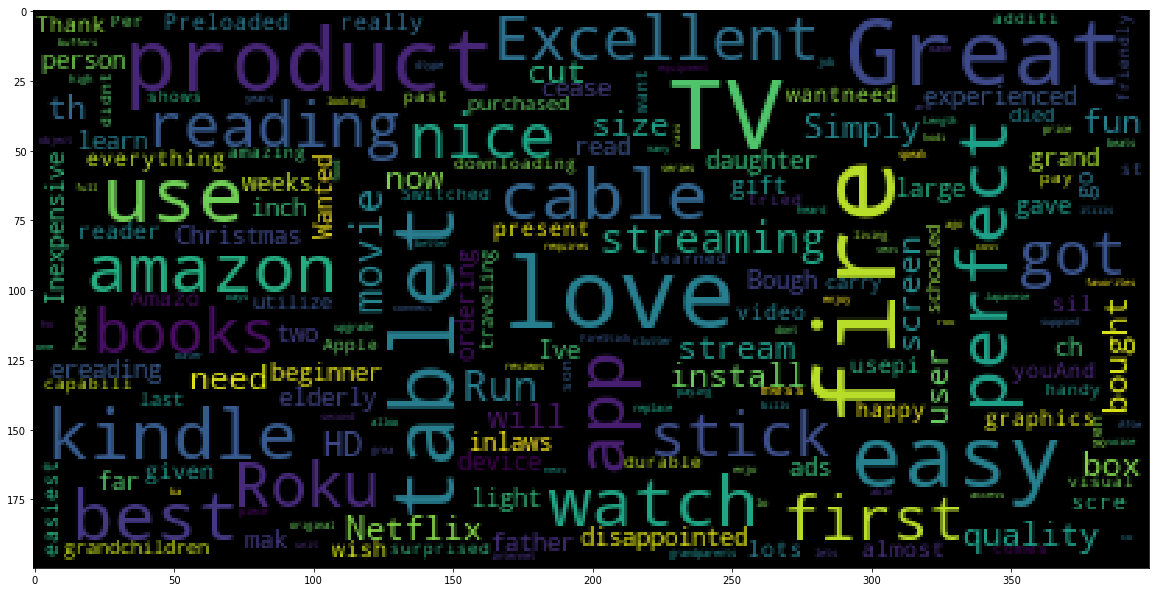

In [205]:
word_cloud(recom_ture['reviews.text'])

# word colud of all the negative reveiw

In [206]:
recom_false = df[df['reviews.doRecommend']==False]

In [207]:
recom_false.shape

(1384, 17)

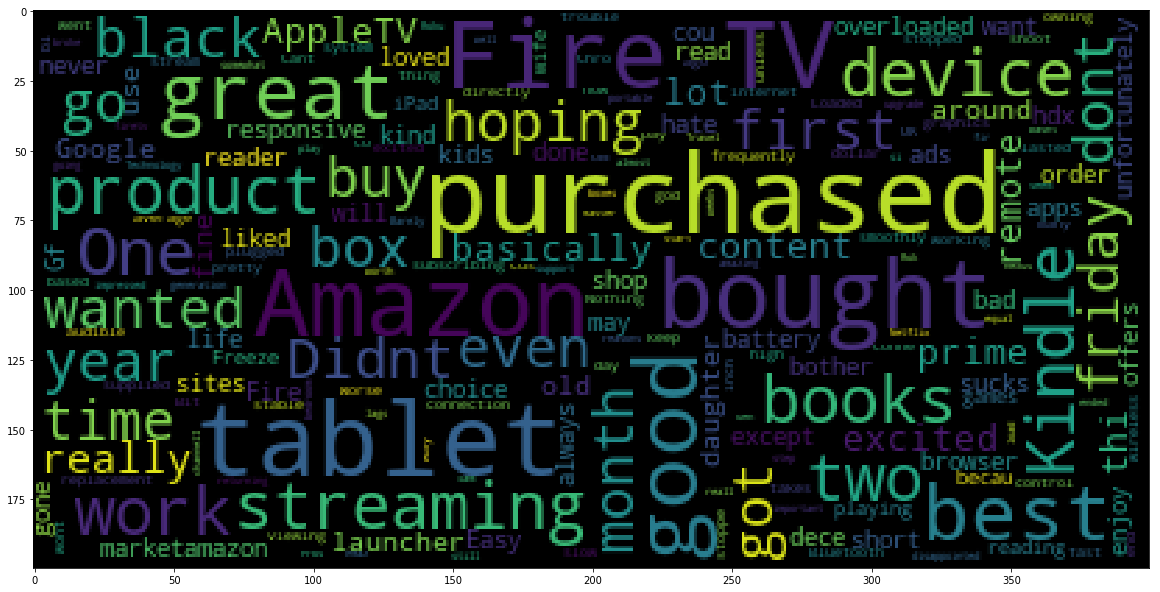

In [208]:
word_cloud(recom_false['reviews.text'],color='black')

In [220]:
X = df['reviews.text']

In [221]:
df['revwPos'] = 0

df['revwPos'].loc[df['reviews.rating'] > 3] =1 

C:\Users\Pawan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [222]:
df[['reviews.rating','revwPos']].sample(10)

,reviews.rating,revwPos
13851,4.0,1
33531,5.0,1
10418,3.0,0
4374,4.0,1
19849,5.0,1
20379,5.0,1
5916,5.0,1
16040,5.0,1
2670,5.0,1
2,5.0,1


In [223]:
df[df['revwPos']==0]['reviews.text']

117      Didnt have some of the features I was looking ...
126      i Bought this around black friday for  hoping ...
169      I bought this tablet for my  year old daughter...
222      I was hoping to use Google launcher with this ...
226      The tablet works fine It is responsive with go...
241      Didnt want to go to the sites amazon wanted me to
281      Not a good product short battery life i can on...
297      This Kindle is so overloaded with apps that I ...
298      Fine for reading havent used it for anything e...
310      I liked it at first except the browser is kind...
338      If ads dont bother you then this may be a dece...
354      Though I have got it for cheap price during bl...
371      This is a good product for video surfing and r...
421      The display is not as sharp and vivid as they ...
431      Good starter unit Easy for a beginner to use P...
444      If you shop on Amazon all the time this will h...
446      fire tablet is very powerful for the size and .

In [224]:
y = df['revwPos']

In [225]:
cntvector = CountVectorizer(stop_words=STOPWORDS)

In [226]:
cntvector.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'you', 'how', 'ours', "she's", 'that', "weren't", "they'll", "it's", 'where', 'your', "why's", "we'll", 'into', 'his', 'all', 'otherwise', 'between', 'over', 'however', 'she', 'up', "we'd", "we're", 'yourselves', "hasn't", 'we', 'am', "she'll", 'same', "couldn't", "she'd", 'themselves', ...ving', 'k', 'myself', "isn't", 'herself', 'those', 'each', "he's", 'out', 'only', 'then', 'against'},
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [227]:
X = cntvector.transform(X)

In [228]:
X.shape

(34659, 17679)

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=23,stratify=y)

In [233]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)

In [234]:
classifier.score(X_test,y_test)

0.9321984997114829

# Using TFIDF 

In [235]:
X = df['reviews.text']
y = df['revwPos']

In [236]:
tfvector = TfidfVectorizer(stop_words=STOPWORDS)

In [237]:
tfvector.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'you', 'how', 'ours', "she's", 'that', "weren't", "they'll", "it's", 'where', 'your', "why's", "we'll", 'into', 'his', 'all', 'otherwise', 'between', 'over', 'however', 'she', 'up', "we'd", "we're", 'yourselves', "hasn't", 'we', 'am', "she'll", 'same', "couldn't", "she'd", 'themselves', ...ving', 'k', 'myself', "isn't", 'herself', 'those', 'each', "he's", 'out', 'only', 'then', 'against'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [238]:
X = tfvector.transform(X)

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=23)

In [240]:
classifier_tfidf = MultinomialNB()
classifier_tfidf.fit(X_train,y_train)
preds=classifier_tfidf.predict(X_test)

In [241]:
classifier_tfidf.score(X_test,y_test)

0.9292171571456049

# Using Logistics Regression 

In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
classifier_logstc = LogisticRegression()
classifier_logstc.fit(X_train,y_train)
preds=classifier_logstc.predict(X_test)

In [244]:
classifier_logstc.score(X_test,y_test)

0.9335449124831698

In [249]:
test = 'this is good but have some defect and I am not statisfied'

In [250]:
test = tfvector.transform([test])

In [251]:
pred = classifier_logstc.predict(test)

In [252]:
pred[0]

1